In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

# Google developer API key
#from config import gkey

# Configure gmaps
#gmaps.configure(api_key=gkey)

url = "https://data.cityofchicago.org/resource/ijzp-q8t2.json"

crimes = requests.get(url).json()


In [7]:
years = []
lat = []
lon = []
crime_types = []
date = []
for crime in crimes:
    years.append(crime['year'])
    crime_types.append(crime['primary_type'])
    date.append(crime['date'])
    try:
        lat.append(crime['latitude'])
        lon.append(crime['longitude'])
    except KeyError:
        lat.append(np.nan)
        lon.append(np.nan)


In [8]:
chicago_crime_2019 = pd.DataFrame({
    "Crime": crime_types,
    "Date": date,
    "Latitude": lat,
    "Longitude": lon
})
chicago_crime_2020['Latitude'] = pd.to_numeric(chicago_crime_2020['Latitude'], errors='coerce')
chicago_crime_2020['Longitude'] = pd.to_numeric(chicago_crime_2020['Longitude'], errors='coerce')
chicago_crime_2020.dtypes

Crime         object
Date          object
Latitude     float64
Longitude    float64
dtype: object

In [9]:
chicago_crime_2020

,Crime,Date,Latitude,Longitude
0,CRIMINAL DAMAGE,2020-04-03T23:58:00.000,41.963521,-87.708320
1,THEFT,2020-04-03T23:55:00.000,41.764682,-87.663786
2,ROBBERY,2020-04-03T23:55:00.000,41.926879,-87.650767
3,PUBLIC PEACE VIOLATION,2020-04-03T23:54:00.000,41.778034,-87.762599
4,ASSAULT,2020-04-03T23:53:00.000,41.888093,-87.755348
...,...,...,...,...
995,DECEPTIVE PRACTICE,2020-04-01T14:21:00.000,41.961108,-87.714723
996,CRIMINAL DAMAGE,2020-04-01T14:15:00.000,41.882114,-87.632361
997,DECEPTIVE PRACTICE,2020-04-01T14:13:00.000,41.962222,-87.655442
998,ASSAULT,2020-04-01T14:12:00.000,41.744931,-87.616376


In [10]:
#Count crime types
chicago_crime_type_df = pd.DataFrame({
    'Crime Types': {
        'Arson': crime_types.count('ARSON'),
        'Assault': crime_types.count('ASSAULT'),
        'Battery': crime_types.count('BATTERY'),
        'Burglary': crime_types.count('BURGLARY'),
        'Criminal Damage': crime_types.count('CRIMINAL DAMAGE'),
        'Deceptive Practic': crime_types.count('DECEPTIVE PRACTICE'),
        'Grand Theft Auto': crime_types.count('MOTOR VEHICLE THEFT'),
        'Homicide': crime_types.count('HOMICIDE'),
        'Interference with Public Officer': crime_types.count('INTERFERENCE WITH PUBLIC OFFICER'),
        'Narcotics': crime_types.count('NARCOTICS'),
        'Offense Involving Children': crime_types.count('OFFENSE INVOLVING CHILDREN'),
        'Other Offense': crime_types.count('OTHER OFFENSE'),
        'Public Peace Violation': crime_types.count('PUBLIC PEACE VIOLATION'),
        'Robbery': crime_types.count('ROBBERY'),
        'Sexual Assault': crime_types.count('CRIMINAL SEXUAL ASSAULT'),
        'Sex Offense': crime_types.count('SEX OFFENSE'),
        'Theft': crime_types.count('THEFT'),
        'Trespass': crime_types.count('CRIMINAL TRESPASS'),
        'Weapons Violation': crime_types.count('WEAPONS VIOLATION')
    }
})

chicago_crime_types = chicago_crime_type_df['Crime Types']
chicago_crime_types

Arson                                 2
Assault                              96
Battery                             251
Burglary                             29
Criminal Damage                     156
Deceptive Practic                    38
Grand Theft Auto                     45
Homicide                              5
Interference with Public Officer      0
Narcotics                             9
Offense Involving Children            6
Other Offense                        55
Public Peace Violation                5
Robbery                              51
Sex Offense                           2
Sexual Assault                        6
Theft                               167
Trespass                             21
Weapons Violation                    55
Name: Crime Types, dtype: int64

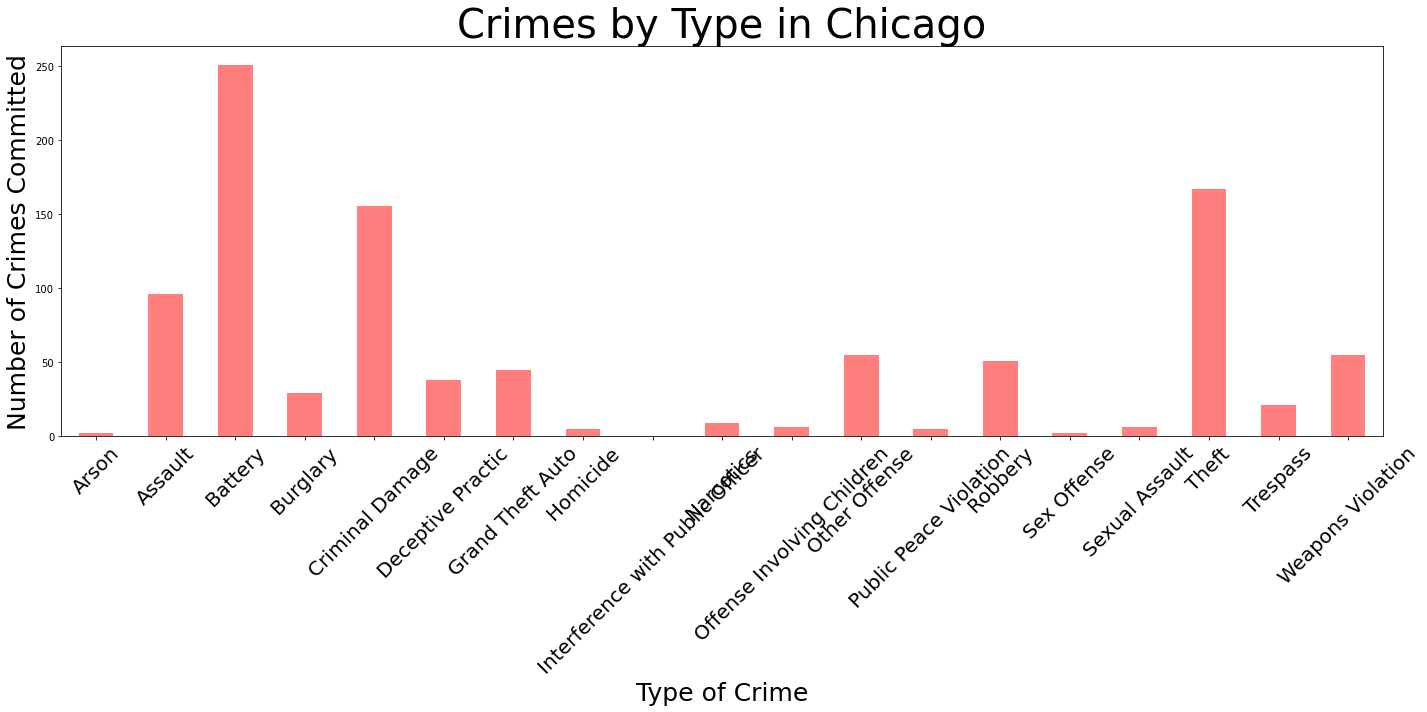

In [11]:
chicago_crime_types.plot(kind="bar", facecolor="red", alpha=.5,figsize=(20,10))
plt.title("Crimes by Type in Chicago",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.tight_layout()
